In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
dataset = pd.read_csv('day.csv')
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
dataset.shape

(730, 16)

In [4]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
categorical_features = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for idx, feature in enumerate(categorical_features):
    print(f'Distribution of {feature}')
    print(dataset[feature].value_counts().to_string())

Distribution of season
3    188
2    184
1    180
4    178
Distribution of yr
0    365
1    365
Distribution of mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Distribution of holiday
0    709
1     21
Distribution of weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Distribution of workingday
1    499
0    231
Distribution of weathersit
1    463
2    246
3     21


# Data Visualisation

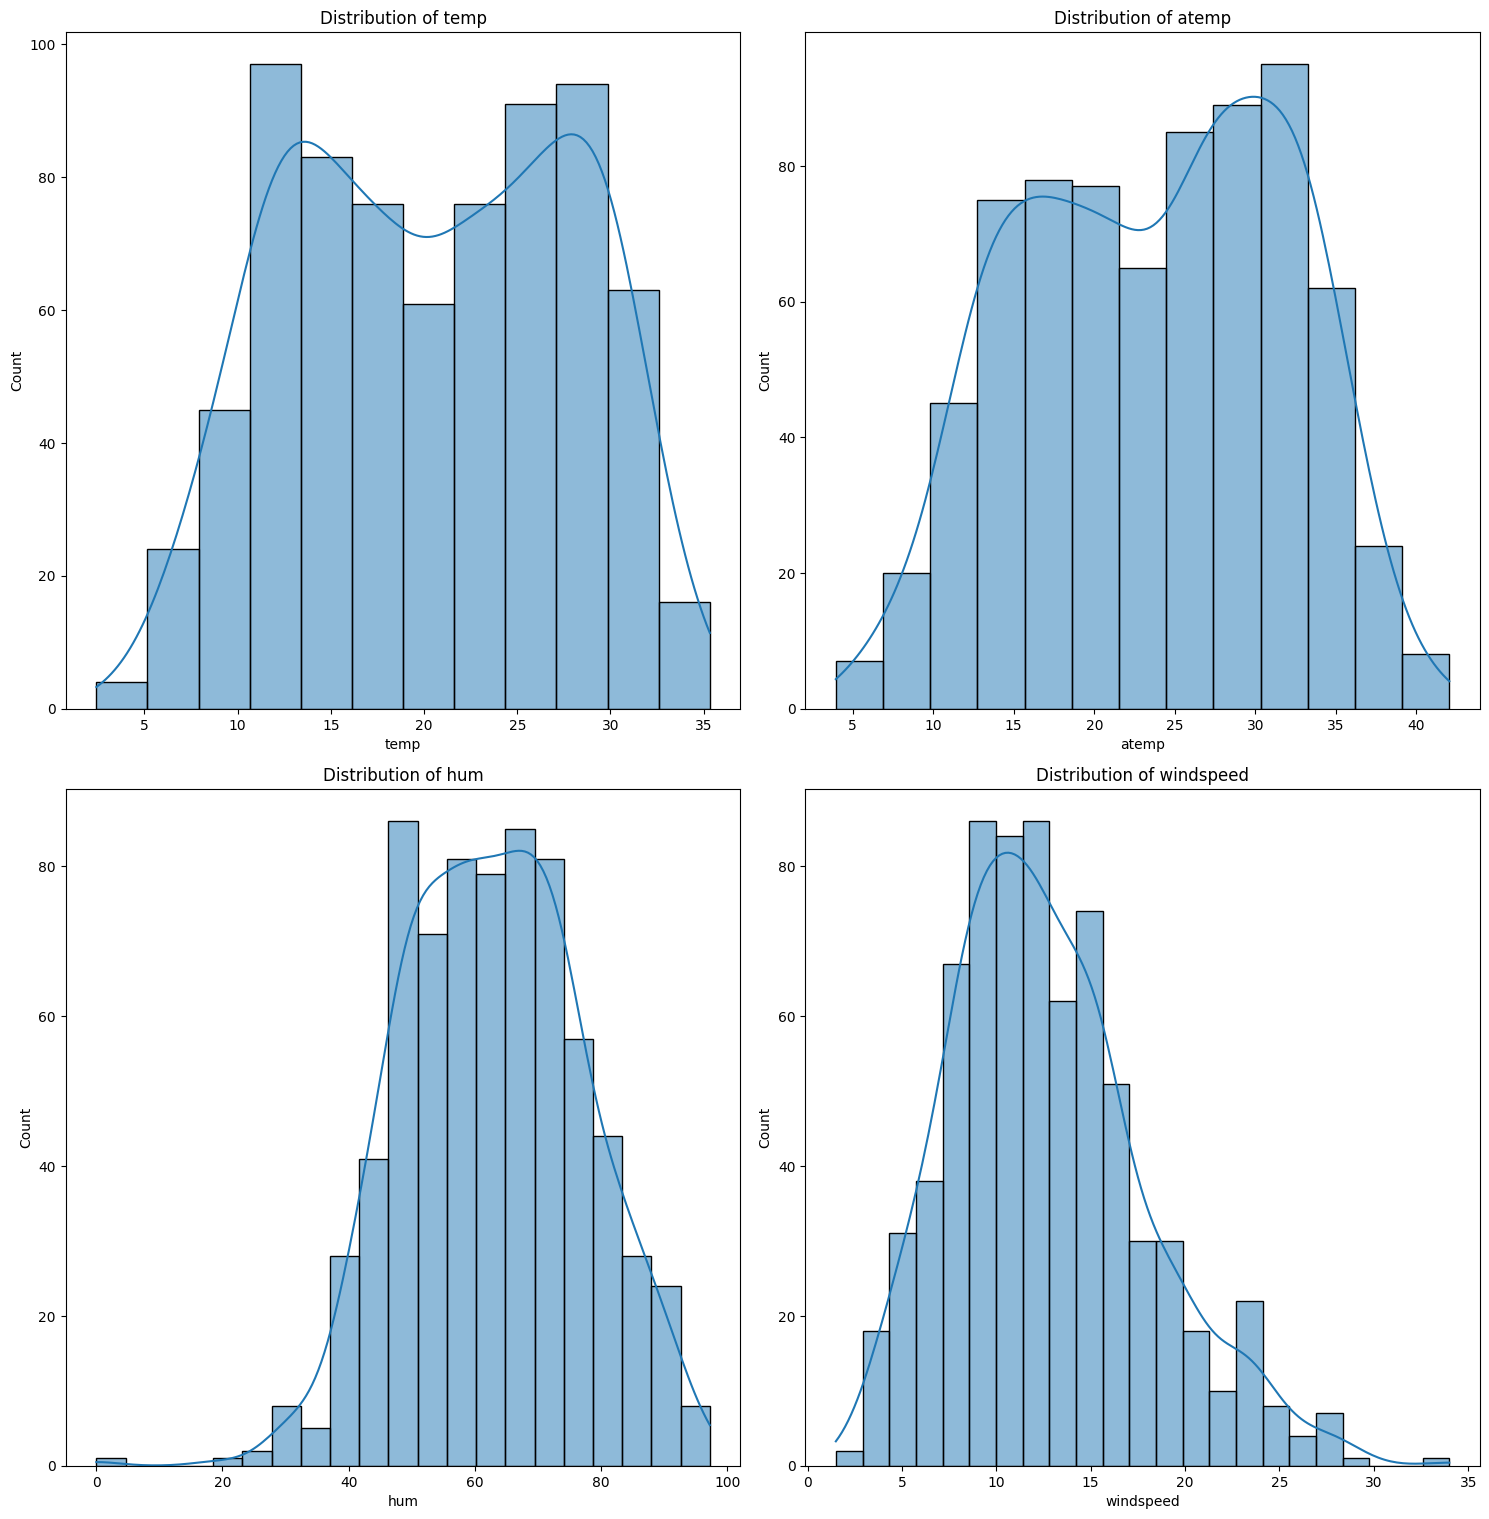

In [8]:
numerical_features = ['temp','atemp','hum','windspeed']

plt.figure(figsize=(15, 30))

for idx, feature in enumerate(numerical_features):
    plt.subplot(4, 2, idx + 1)  
    sns.histplot(dataset[feature], kde=True) 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

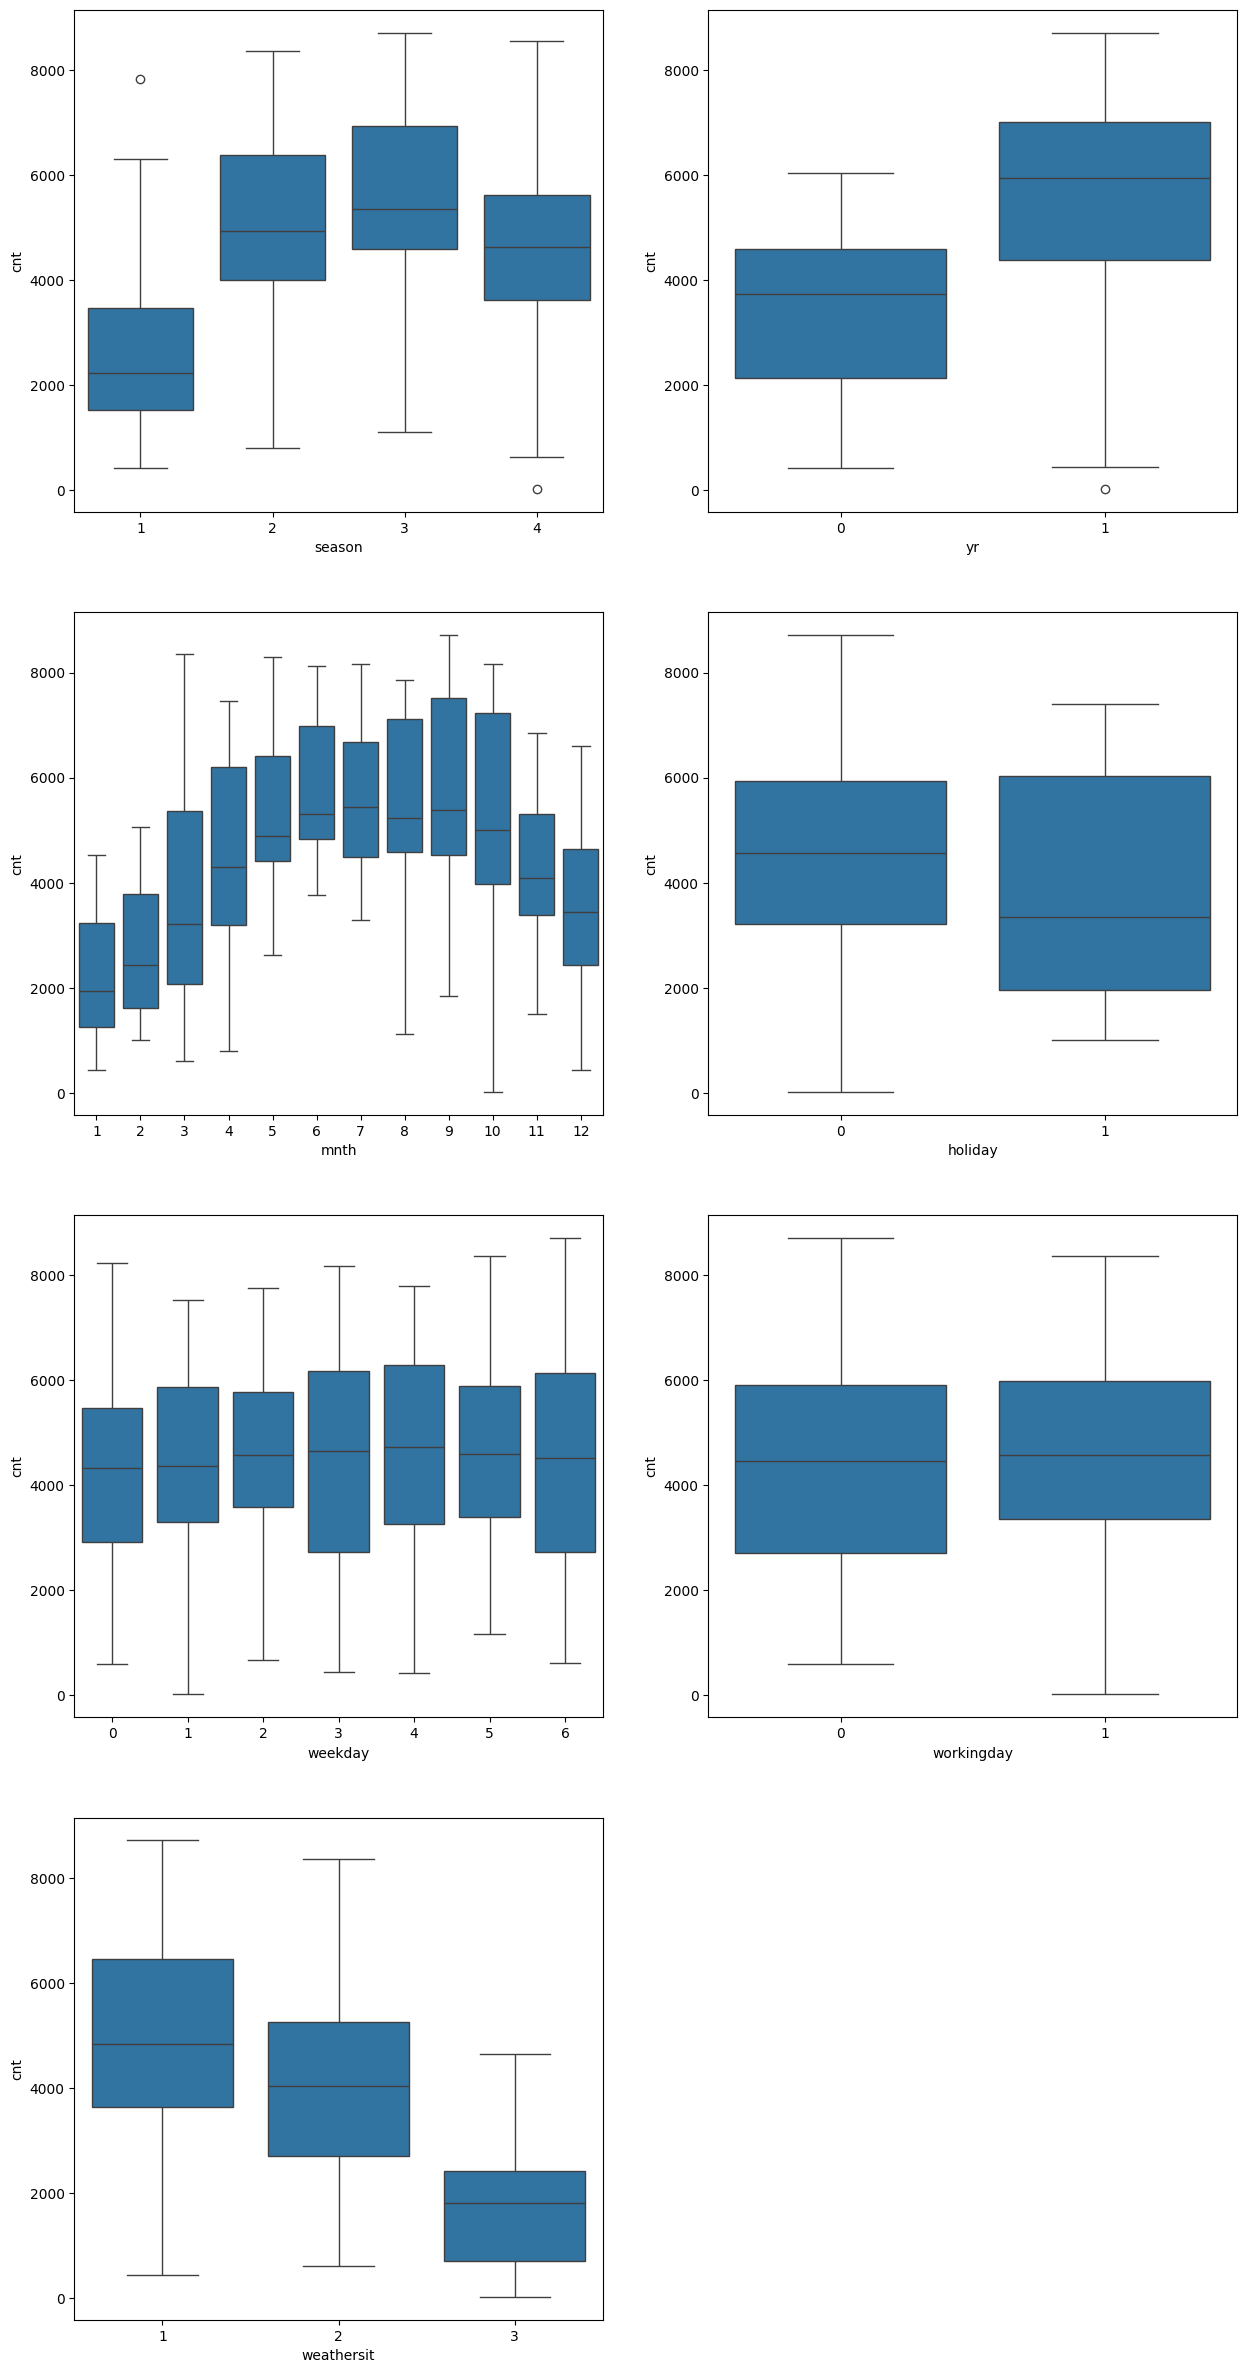

In [9]:
plt.figure(figsize=(15, 30))
for idx, feature in enumerate(categorical_features):
    plt.subplot(4,2,idx+1)
    sns.boxplot(x=feature,y="cnt",data=dataset)
    
# plt.tight_layout()
plt.show()

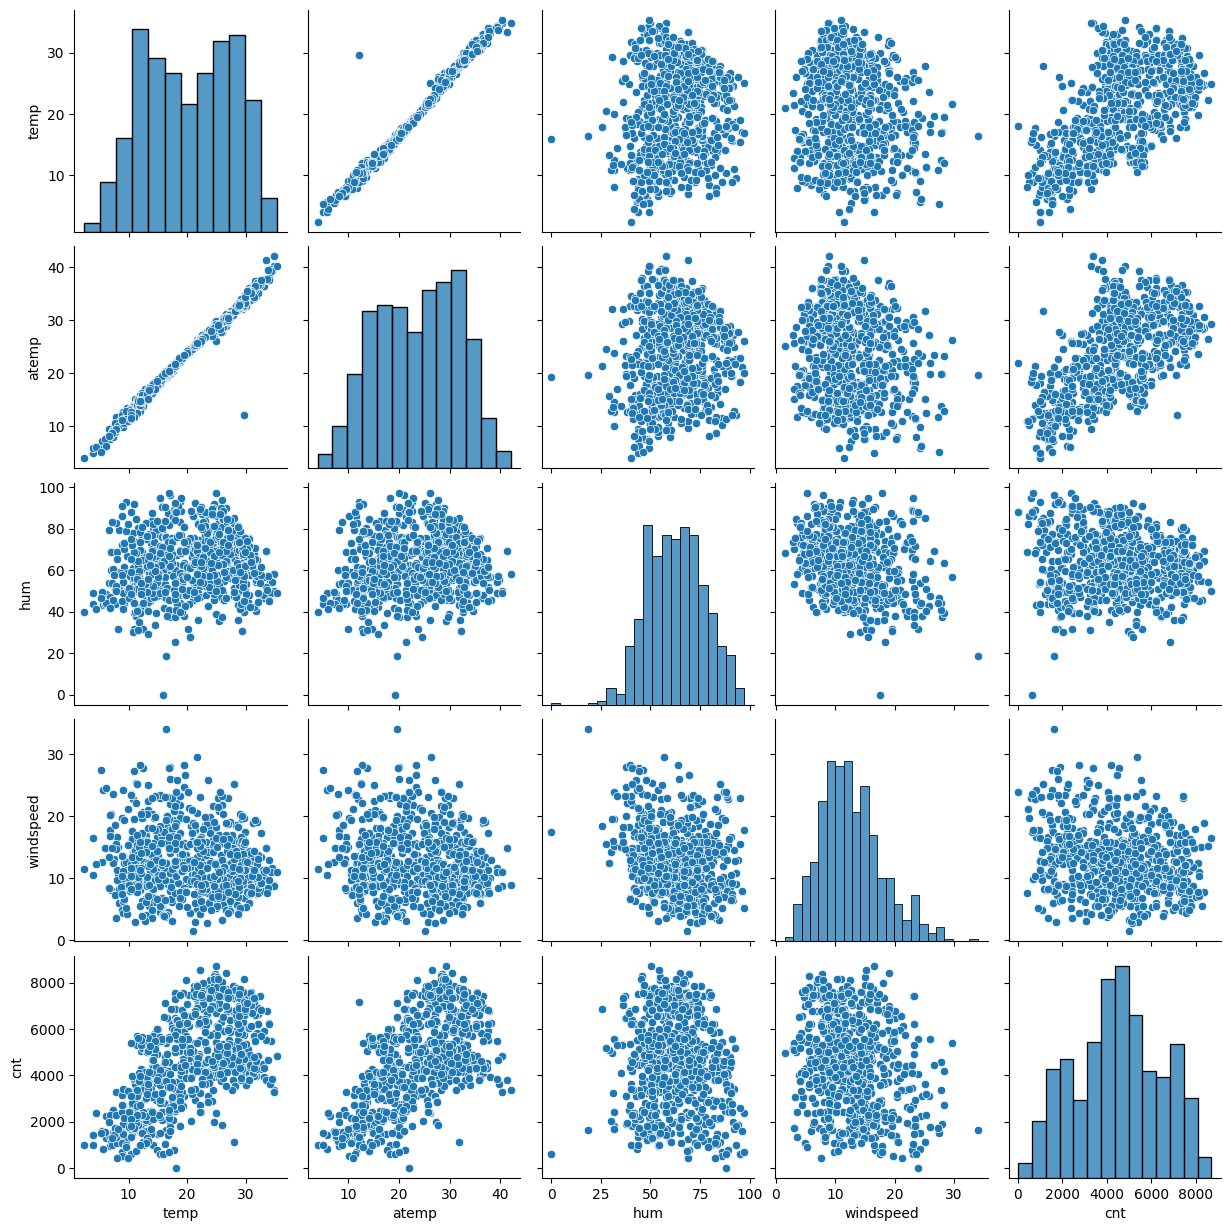

In [10]:
features_for_pairplot = numerical_features + ['cnt']
sns.pairplot(dataset[features_for_pairplot])
plt.show()

<Axes: >

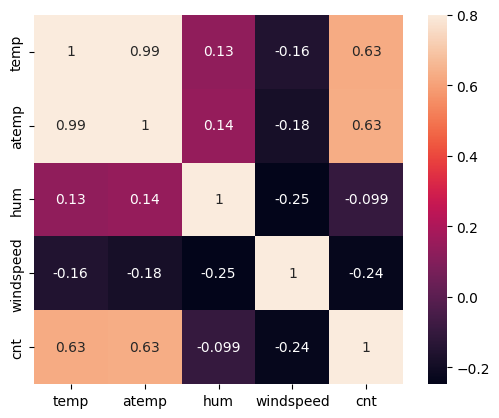

In [11]:
cor = dataset[features_for_pairplot].corr()
sns.heatmap(cor,vmax=.8,annot=True,square=True)

In [12]:
numerical_features.remove('atemp')
dataset.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'],axis=1,inplace = True)
dataset

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


# Data Preparation

In [13]:
X = dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [14]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,80.5833,10.749882,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,69.6087,16.652113,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,65.2917,23.458911,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
726,10.386653,59.0000,10.416557,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
727,10.386653,75.2917,8.333661,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,10.489153,48.3333,23.500518,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[numerical_features] = scaler.fit_transform(X[numerical_features])
X

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.355170,0.828620,0.284606,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.379232,0.715771,0.466215,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.171000,0.449638,0.465740,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.175530,0.607131,0.284297,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.209120,0.449313,0.339143,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.243025,0.671380,0.675656,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
726,0.241986,0.606684,0.274350,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
727,0.241986,0.774208,0.210260,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.497001,0.676936,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building and evaluation

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (511, 28)
Shape of X_test: (219, 28)
Shape of y_train: (511,)
Shape of y_test: (219,)


<Axes: >

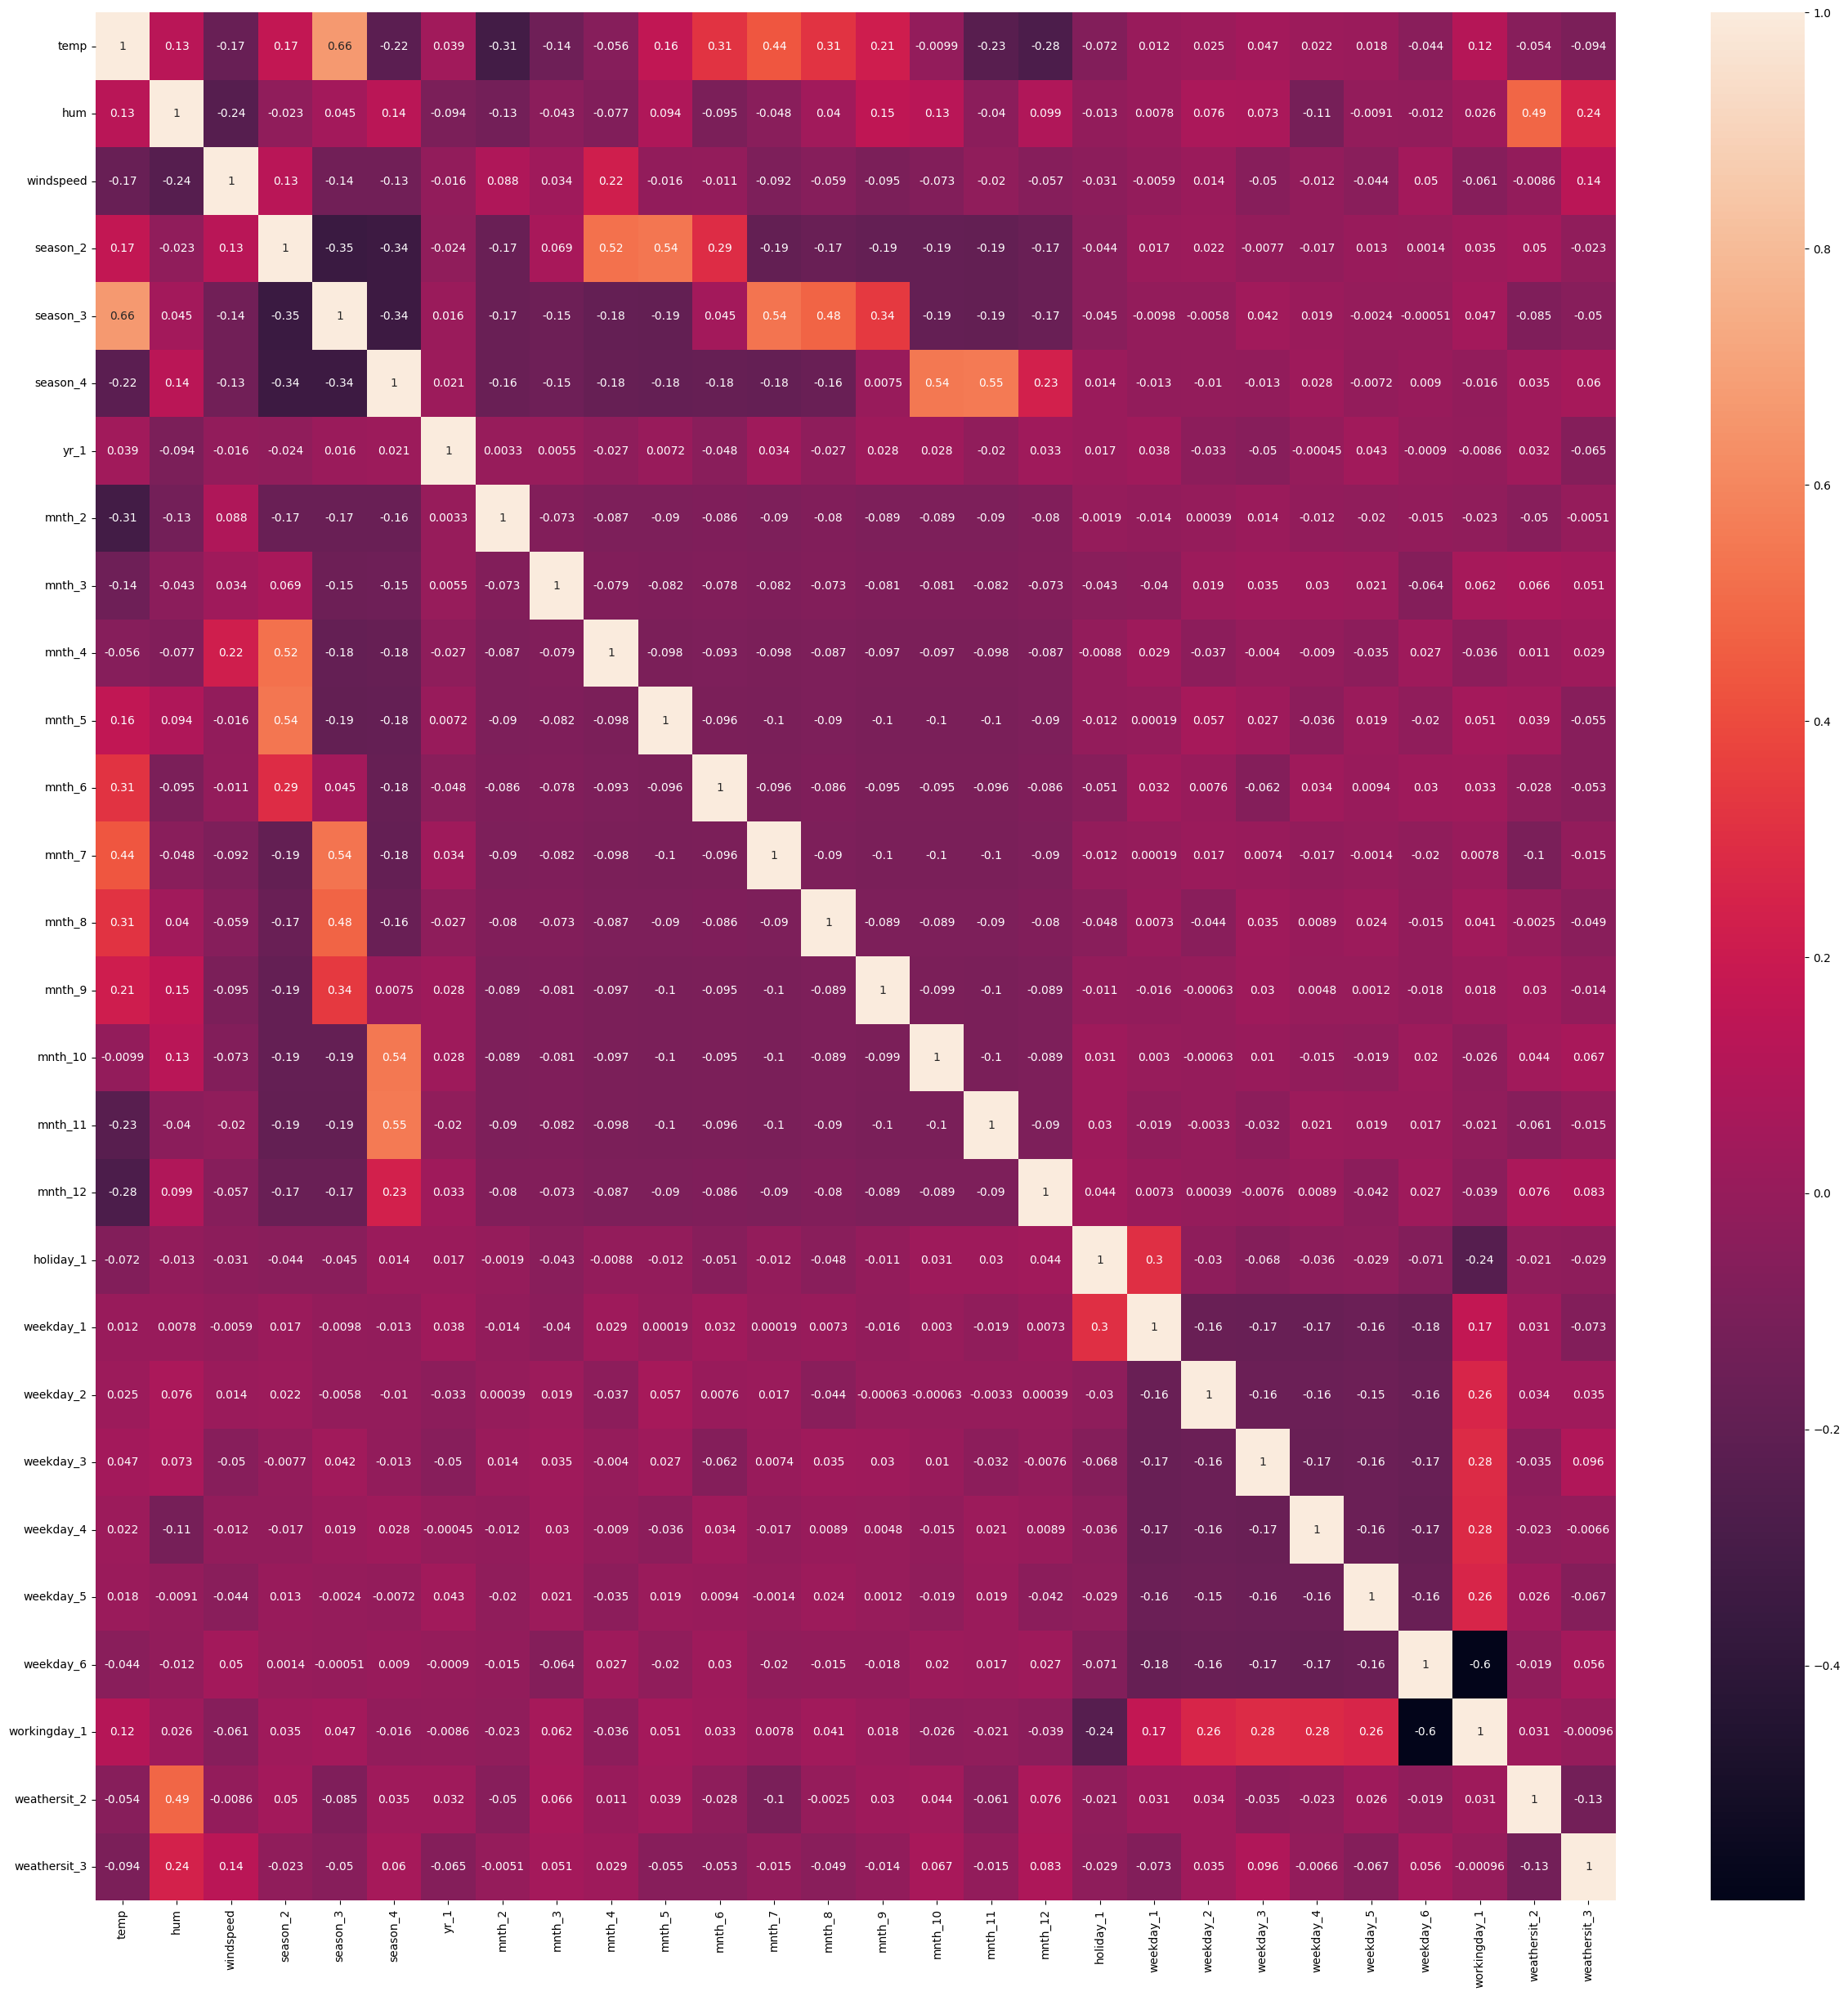

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),annot=True)

In [18]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_lm).fit()

In [19]:
lr.params

const           1592.780124
temp            3732.721399
hum            -1351.254789
windspeed      -1221.311213
season_2        1327.084338
season_3        1224.599200
season_4        1860.331855
yr_1            1950.873694
mnth_2           133.653470
mnth_3           452.130105
mnth_4           -30.058448
mnth_5           218.797966
mnth_6           -60.686160
mnth_7          -406.883339
mnth_8          -149.667366
mnth_9           574.449511
mnth_10          303.624366
mnth_11         -428.548247
mnth_12         -319.748388
holiday_1       -321.953098
weekday_1        -47.524924
weekday_2       -129.433005
weekday_3         18.770720
weekday_4         51.517823
weekday_5        109.205056
weekday_6        391.926990
workingday_1     324.488768
weathersit_2    -490.307481
weathersit_3   -1903.173557
dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)
print(lm.coef_)
print(lm.intercept_)

[ 3732.7213992  -1351.25478873 -1221.31121323  1327.08433847
  1224.59920043  1860.33185462  1950.87369393   133.65346992
   452.13010493   -30.05844814   218.79796577   -60.68615987
  -406.88333875  -149.6673657    574.44951071   303.62436626
  -428.54824675  -319.74838766  -321.9530977    -47.52492353
  -129.43300518    18.77071993    51.51782261   109.20505618
   391.92698973   324.4887677   -490.30748076 -1903.17355729]
1592.780124200181


In [21]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.56
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          2.77e-178
Time:                        16:33:05   Log-Likelihood:                -4111.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1592.7801    282.636      5.635      0.000    1037.431    2148.129
temp          3732.7214    401.977      9.286      0.000    2942.881    4522.562
hum          -1351.2548    341.908     -3.952      0.000   -2023.065    -679.444
windspeed    -1221.3112    252.026     -4.846      0.000   -1716.515    -726.108
season_2      1327.0843    240.945      5.508      0.000     853.654    1800.515
season_3      1224.5992    269.959      4.536      0.000     694.159    1755.039
season_4      1860.3319    229.500      8.106      0.000    1409.391    2311.273
yr_1          1950.8737     70.803     27.554      0.000    1811.754    2089.994
mnth_2         133.6535    174.811      0.765      0.445    -209.831     477.138
mnth_3         452.1301    216.942      2.084      0.038      25.864     878.396
mnth_4         -30.0584    311.204     -0.097      0.923    -641.540     581.423
mnth_5         218.7980    332.118      0.659      0.510    -433.777     871.373
mnth_6         -60.6862    348.932     -0.174      0.862    -746.299     624.926
mnth_7        -406.8833    379.177     -1.073      0.284   -1151.924     338.157
mnth_8        -149.6674    369.865     -0.405      0.686    -876.411     577.076
mnth_9         574.4495    324.854      1.768      0.078     -63.853    1212.752
mnth_10        303.6244    297.223      1.022      0.308    -280.386     887.635
mnth_11       -428.5482    281.490     -1.522      0.129    -981.644     124.548
mnth_12       -319.7484    221.936     -1.441      0.150    -755.827     116.331
holiday_1     -321.9531    199.032     -1.618      0.106    -713.029      69.122
weekday_1      -47.5249     85.524     -0.556      0.579    -215.570     120.520
weekday_2     -129.4330     96.379     -1.343      0.180    -318.807      59.941
weekday_3       18.7707     95.873      0.196      0.845    -169.610     207.151
weekday_4       51.5178     93.567      0.551      0.582    -132.331     235.367
weekday_5      109.2051     96.650      1.130      0.259     -80.702     299.112
weekday_6      391.9270    126.226      3.105      0.002     143.906     639.948
workingday_1   324.4888     80.268      4.043      0.000     166.772     482.206
weathersit_2  -490.3075     92.032     -5.328      0.000    -671.140    -309.475
weathersit_3 -1903.1736    235.355     -8.086      0.000   -2365.619   -1440.728
==============================================================================
Omnibus:                       82.527   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.772
Skew:                          -0.844   Prob(JB):                     1.38e-42
Kurtosis:                       5.491   Cond. No.                     2.25e+15
==============================================================================

Notes:
[1] Stand

In [22]:
from sklearn.feature_selection import RFE
lmr = LinearRegression()
rfe1 = RFE(estimator=lmr,n_features_to_select=15)

rfe1.fit(X_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True False  True False False False
 False False  True  True False False  True False False False False False
  True  True  True  True]
[ 1  1  1  1  1  1  1  7  1 13  5 11  4  9  1  1  2  3  1  8  6 14 12 10
  1  1  1  1]


In [23]:
col1 = X_train.columns[rfe1.support_]
col1

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [24]:
X_train_rfe1 = X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          5.79e-188
Time:                        16:33:05   Log-Likelihood:                -4119.4
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     495   BIC:                             8339.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1590.1970    268.524      5.922      0.000    1062.609    2117.785
temp          3778.4373    293.226     12.886      0.000    3202.317    4354.558
hum          -1348.5328    328.361     -4.107      0.000   -1993.686    -703.380
windspeed    -1256.4259    248.865     -5.049      0.000   -1745.388    -767.463
season_2      1356.3071    138.013      9.827      0.000    1085.143    1627.472
season_3       919.7586    184.038      4.998      0.000     558.167    1281.350
season_4      1468.1731    123.878     11.852      0.000    1224.781    1711.565
yr_1          1951.7643     70.060     27.858      0.000    1814.112    2089.417
mnth_3         428.9592    150.328      2.853      0.005     133.600     724.318
mnth_9         872.0853    132.244      6.594      0.000     612.256    1131.915
mnth_10        673.3675    149.942      4.491      0.000     378.766     967.969
holiday_1     -401.3423    227.317     -1.766      0.078    -847.967      45.283
weekday_6      397.6637    125.862      3.160      0.002     150.374     644.953
workingday_1   343.8130     98.593      3.487      0.001     150.102     537.524
weathersit_2  -492.8489     90.905     -5.422      0.000    -671.455    -314.242
weathersit_3 -1947.5093    232.292     -8.384      0.000   -2403.910   -1491.109
==============================================================================
Omnibus:                       88.481   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.227
Skew:                          -0.915   Prob(JB):                     5.48e-44
Kurtosis:                       5.452   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
a = X_train_rfe1.drop('const',axis=1)

In [ ]:
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,temp,24.44
1,hum,17.10
4,season_3,7.36
12,workingday_1,4.98
2,windspeed,4.71
3,season_2,4.12
5,season_4,3.21
13,weathersit_2,2.10
6,yr_1,2.05
11,weekday_6,1.88


In [27]:
from sklearn.feature_selection import RFE
lmr = LinearRegression()
rfe2 = RFE(estimator=lmr,n_features_to_select=7)

rfe2.fit(X_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

col2 = X_train.columns[rfe2.support_]
print(col2)

X_train_rfe2 = X_train[col2]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

[ True  True  True False False  True  True False False False False False
 False False  True False False False False False False False False False
 False False False  True]
[ 1  1  1  2  3  1  1 15  7 21 13 19 12 17  1  5 10 11  4 16 14 22 20 18
  8  9  6  1]
Index(['temp', 'hum', 'windspeed', 'season_4', 'yr_1', 'mnth_9',
       'weathersit_3'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.28e-164
Time:                        16:33:05   Log-Likelihood:                -4197.1
No. Observations:                 511   AIC:                             8410.
Df Residuals:                     503   BIC:                             8444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2135.6641    267.104      7.996      0.000    1610.888    2660.441
temp          5478.8364    189.662     28.887      0.000    5106.209    5851.463
hum          -2245.0004    306.757     -7.319      0.000   -2847.682   -1642.319
windspeed    -1212.5659    280.062     -4.330      0.000   -1762.801    -662.331
season_4      1091.2061     96.787     11.274      0.000     901.050    1281.362
yr_1          1896.4808     80.364     23.599      0.000    1738.591    2054.371
mnth_9         649.8191    143.863      4.517      0.000     367.173     932.465
weathersit_3 -1375.3201    249.849     -5.505      0.000   -1866.196    -884.444
==============================================================================
Omnibus:                       42.375   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.056
Skew:                          -0.604   Prob(JB):                     3.35e-14
Kurtosis:                       4.206   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
b = X_train_rfe2.drop('const',axis=1)
vif2 = pd.DataFrame()
vif2['features'] = b.columns
vif2['VIF'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif2['VIF'] = round(vif2['VIF'],2)
vif2 = vif2.sort_values(by="VIF",ascending=False)
vif2

,features,VIF
1,hum,10.43
0,temp,7.01
2,windspeed,4.37
4,yr_1,2.02
3,season_4,1.45
5,mnth_9,1.16
6,weathersit_3,1.10


<Figure size 640x480 with 0 Axes>

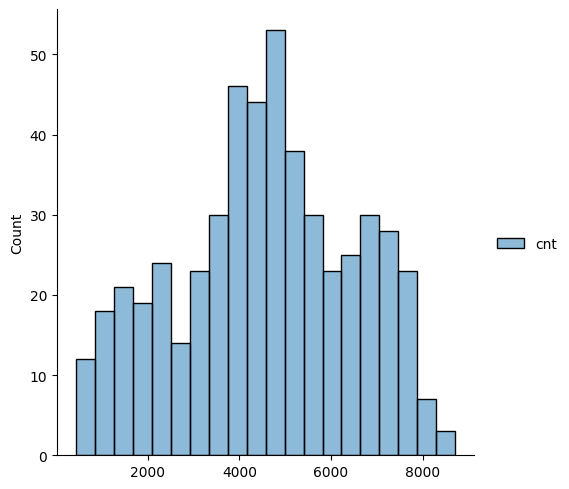

In [29]:
y_train_cnt = lm2.predict(X_train_rfe2)

fig = plt.figure()
sns.displot((y_train,y_train_cnt),bins=20)

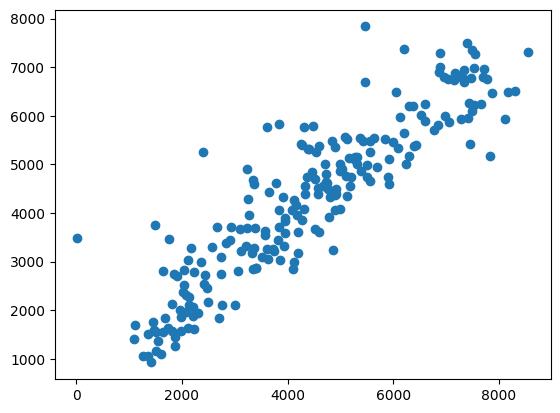

In [30]:
X_test_rfe2 = X_test[col2]
X_test_rfe2 = sm.add_constant(X_test_rfe2)
y_pred = lm2.predict(X_test_rfe2)
plt.figure()
plt.scatter(y_test,y_pred)

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8061307079107816